In [64]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, Dropout, Dense
import pickle
import numpy as np
import os

In [6]:
BASE_DIR = '/content/drive/MyDrive/final_project'
train_path = os.path.join(BASE_DIR, 'out', 'train')
train_path

'/content/drive/MyDrive/final_project/out/train'

In [7]:
X_train = pickle.load(open(os.path.join(train_path, 'X_train.pickle'), 'rb'))
y_train = pickle.load(open(os.path.join(train_path, 'y_train.pickle'), 'rb'))
X_train.shape, y_train.shape

((884, 224, 224, 3), (884,))

In [55]:
test_path = os.path.join(BASE_DIR, 'out', 'test')
X_test = pickle.load(open(os.path.join(test_path, 'X_test.pickle'), 'rb'))
y_test = pickle.load(open(os.path.join(test_path, 'y_test.pickle'), 'rb'))
X_test.shape, y_test.shape

((99, 224, 224, 3), (99,))

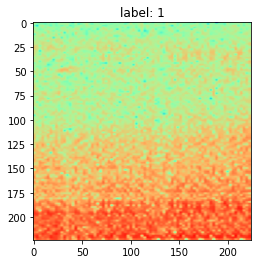

In [30]:
plt.title(f'label: {y_train[1]}')
plt.imshow(X_train[1])
plt.show()

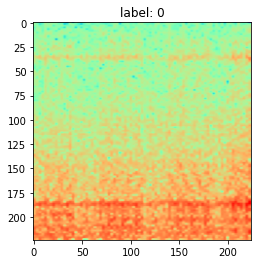

In [33]:
plt.title(f'label: {y_train[4]}')
plt.imshow(X_train[4])

plt.show()

####**Model Training**
First Let's try a simple CNN architecture

In [83]:
simple_model = Sequential()
simple_model.add(Conv2D(64, (11, 11), activation='relu', padding='valid', strides=4, input_shape=[224, 224, 3]))

simple_model.add(MaxPooling2D(pool_size=(3, 3)))
simple_model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
simple_model.add(MaxPooling2D(pool_size=(3, 3)))
simple_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
simple_model.add(MaxPooling2D(pool_size=(3, 3)))

simple_model.add(Flatten())
simple_model.add(Dense(1024, activation='relu'))
simple_model.add(Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
simple_model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
simple_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 54, 54, 64)        23296     
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 18, 18, 128)       204928    
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 6, 6, 128)         147584    
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 2, 2, 128)      

In [84]:
history = simple_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
23/23 [==============================] - 1s 35ms/step - loss: 0.6890 - accuracy: 0.5233 - val_loss: 0.6838 - val_accuracy: 0.5706
Epoch 2/50
23/23 [==============================] - 0s 22ms/step - loss: 0.6795 - accuracy: 0.5997 - val_loss: 0.6687 - val_accuracy: 0.6384
Epoch 3/50
23/23 [==============================] - 1s 22ms/step - loss: 0.6504 - accuracy: 0.6464 - val_loss: 0.6495 - val_accuracy: 0.5989
Epoch 4/50
23/23 [==============================] - 0s 21ms/step - loss: 0.5927 - accuracy: 0.7115 - val_loss: 0.5444 - val_accuracy: 0.7232
Epoch 5/50
23/23 [==============================] - 0s 21ms/step - loss: 0.5029 - accuracy: 0.7638 - val_loss: 0.4349 - val_accuracy: 0.8531
Epoch 6/50
23/23 [==============================] - 0s 21ms/step - loss: 0.4560 - accuracy: 0.8020 - val_loss: 0.3870 - val_accuracy: 0.8079
Epoch 7/50
23/23 [==============================] - 0s 22ms/step - loss: 0.4124 - accuracy: 0.8345 - val_loss: 0.3658 - val_accuracy: 0.8531
Epoch 8/50
23

**Testing on testset**

In [85]:
simple_model.evaluate(X_test, y_test, batch_size=32)

4/4 [==============================] - 0s 11ms/step - loss: 0.0629 - accuracy: 0.9899


[0.06292779743671417, 0.9898989796638489]

In [86]:
def make_predictions(y_preds, threshold=0.6):
  pred_list = []
  for pred in y_preds:
    pred_list.append(pred[0])
  return (np.array(pred_list) > threshold).astype(int)

In [88]:
count = 45
y_pred = simple_model.predict(X_test[:count])
y_true = y_test[:count]
pred_true = zip(make_predictions(y_pred, threshold=0.6), y_true)

print(list(pred_true))  ### (predictions, true label)

[(0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0)]
